In [1]:
import sklearn.linear_model

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot

In [8]:
trains = pd.read_csv('../data/sydtrains.csv', thousands=',', index_col='STATION')

In [11]:
trains2014 = trains[trains.YEAR == 2014]
trains2014.columns

Index([u'LINE', u'YEAR', u'SURVEY_DATE_USED', u'WHETHER_SURVEYED',
       u'IN_0200_0600', u'OUT_0200_0600', u'IN_0600_0930', u'OUT_0600_0930',
       u'IN_0930_1500', u'OUT_0930_1500', u'IN_1500_1830', u'OUT_1500_1830',
       u'IN_1830_0200', u'OUT_1830_0200', u'IN_24_HOURS', u'OUT_24_HOURS',
       u'RANK', u'STATION_SORT_ID'],
      dtype='object')

In [21]:
scatter_data_in = trains2014.loc[ : , ['IN_1500_1830' , 'IN_1830_0200', 'OUT_0600_0930']]

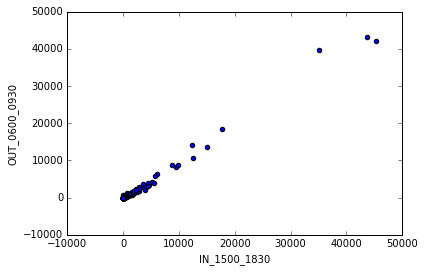

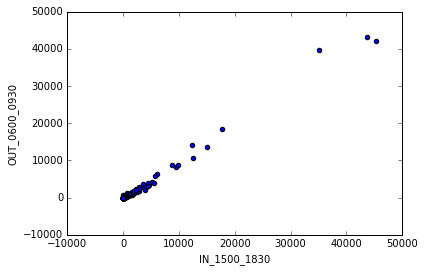

In [23]:
trains2014.loc[ : , ['IN_1500_1830' , 'IN_1830_0200', 'OUT_0600_0930']].plot(kind='scatter', x='IN_1500_1830', y = 'OUT_0600_0930')
trains2014.loc[ : , ['IN_1500_1830' , 'IN_1830_0200', 'OUT_0600_0930']].plot(kind='scatter', x='IN_1500_1830', y = 'OUT_0600_0930')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a313fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1198fda10>]], dtype=object)

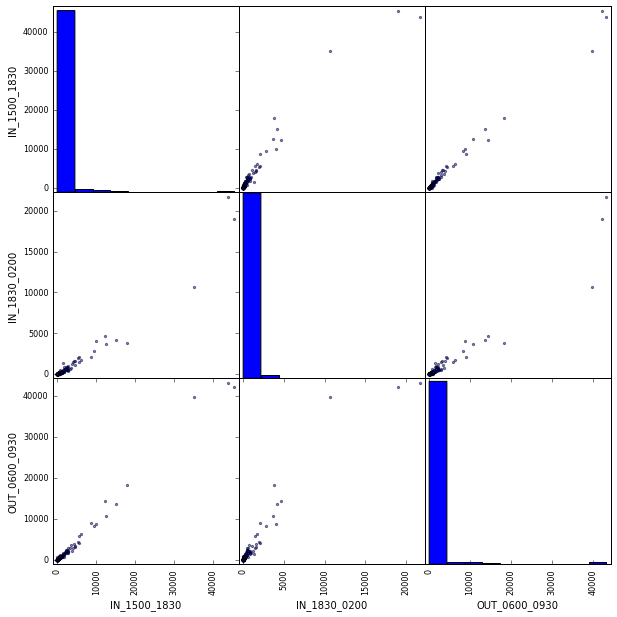

In [30]:
pd.scatter_matrix(scatter_data_in, figsize=(10,10))

In [32]:
getoff_am = trains2014.loc[ : , ['OUT_0600_0930']] #gets this column as a dataframe
getin_pm = trains2014.IN_1500_1830 #this gets it as a series

In [65]:
regressor = sklearn.linear_model.RANSACRegressor(max_trials=10000)

In [66]:
regressor.fit(getoff_am, getin_pm)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=10000, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [67]:
predictions_pm = regressor.predict(getoff_am) #test the regressor against original data to see how it matches up

In [68]:
predictions_pm

array([  4.62631127e+04,   4.75162153e+04,   4.35700414e+04,
         1.50784464e+04,   2.01787936e+04,   1.17698159e+04,
         9.03277611e+03,   4.80080694e+03,   4.47104311e+03,
         9.63734314e+03,   1.56830134e+04,   2.43749948e+03,
         9.80222505e+03,   3.72357842e+03,   3.23992480e+03,
         4.21822417e+03,   2.50345224e+03,   2.22864905e+03,
         3.28389331e+03,   1.79995607e+03,   1.98682224e+03,
         6.93327972e+03,   1.75598756e+03,   3.55869651e+03,
         6.48260248e+03,   8.76617341e+02,   1.19538905e+03,
         2.00880650e+03,   2.51444437e+03,   1.62408203e+03,
         1.47019224e+03,   2.73428693e+03,   1.83293245e+03,
         8.10664575e+02,   2.04178288e+03,   3.94342098e+03,
         9.86538619e+02,   2.33857033e+03,   1.45920011e+03,
         7.66696064e+02,   1.16241266e+03,   2.56940501e+03,
         1.69003479e+03,   1.23935756e+03,   1.18439692e+03,
         1.03050713e+03,   3.20694842e+03,   1.11844415e+03,
         1.90987735e+03,

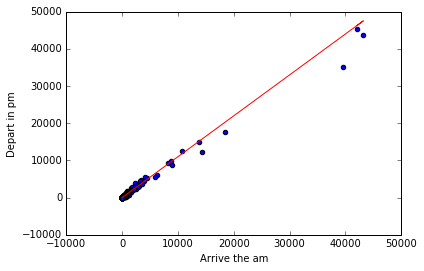

In [69]:
#draw the original data points
matplotlib.pyplot.scatter(x=trains2014.OUT_0600_0930, y=trains2014.IN_1500_1830)
#draw the prediction as a line to see how good the regression was
matplotlib.pyplot.plot(trains2014.OUT_0600_0930, predictions_pm, color = 'red')
matplotlib.pyplot.xlabel('Arrive the am')
matplotlib.pyplot.ylabel('Depart in pm')

In [70]:
regressor.estimator_ #returns a linear regression object

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
#gets the gradient of the line
regressor.estimator_.coef_ 
#for every passenger that gets out of a train station in the morning, 1.16 passengers get in the afternoon

array([ 1.09921277])

In [73]:
regressor.estimator_.intercept_
#finds y where x is 0

19.231378792037219